#Post Test - Adaline

Adaline (adaptive **linear** layout) secara sederhana dapat dipahami sebagai Jaringan Syaraf Tiruan dengan neuron tunggal (neuron input tidak dihitung) dengan fungsi aktivasi **linear**.

Pada praktikum sebelumnya, kita sudah menerapkan Adaline dengan fungsi aktivasi bipolar pada pengujiannya. Hal ini dikarenakan sebelumnya kita menggunakan Adaline untuk kasus klasifikasi.

Pada Post Test kali ini, teman-teman akan menerapkan Adaline untuk kasus regresi linear sederhana.

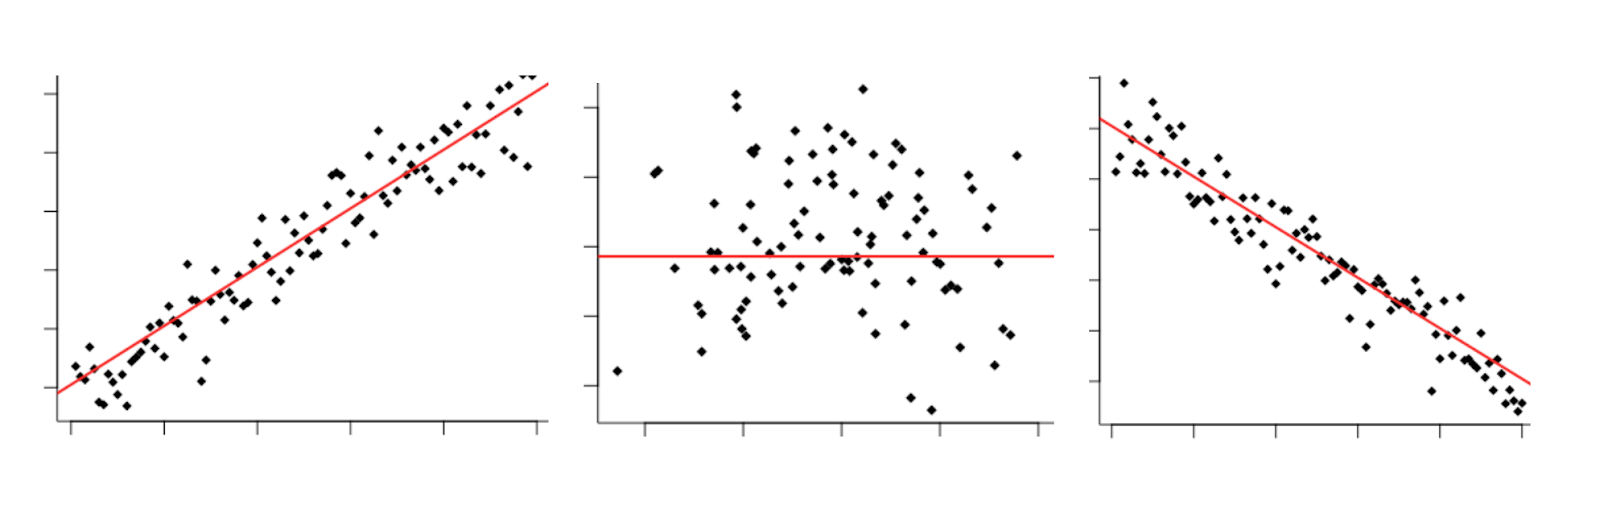

## Kode (jangan diubah)

Fungsi Training Adaline

In [1]:
#jangan diubah
import sys
def adaline_fit(x, t, alpha=.1, max_err=.1, max_epoch=-1, verbose=False):
  w = np.random.uniform(0, 1, len(x[0]) + 1)
  b = np.ones((len(x), 1))
  x = np.hstack((b, x))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    epoch += 1
    max_ch = -sys.maxsize
    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(x):
      y = np.dot(row, w)
      for i in range(len(row)):
        w_new = w[i] + alpha * (t[r] - y) * row[i]
        max_ch = max(abs(w[i] - w_new), max_ch)
        w[i] = w_new
      if verbose:
        print('Bobot:', w)
    stop = max_ch < max_err
  return w, epoch

## Masalah

Diketahui terdapat persamaan linear 1 variabel yang memetakan x ke f(x). Teman-teman harus bisa menerapkan Adaline untuk menyelesaikan permasalahan linear berdasarkan data yang diberikan.

Berikut beberapa petunjuk yang bisa diperhatikan.

1.   Buat fungsi aktivasi linear dengan nama linstep().
2.   Gunakan fungsi linstep pada fungsi pengujian.
3.   Nilai output / hasil prediksi tidak harus sama persis dengan hitungan matematikanya, tetapi setidaknya mendekati.
4.   Teman-teman bebas menentukan epoch, learning rate, dan parameter lainnya selama proses training berjalan dan menghasilkan prediksi yang sesuai.



Data

In [2]:
# pada x(fitur), indeks kedua di tuple akan selalu 0, karena kita hanya menggunakan 1 fitur dan fungsi train dari modul tetap dapat digunakan

x = (1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),(10,0)
fx = 13,18,23,28,33,38,43,48,53,58

Buat fungsi aktivasi linear bernama linstep()

In [3]:
def linstep(x):
    return x

Buat fungsi pengujian bernama adaline_predict()

In [6]:
import numpy as np

def adaline_predict(x, w):
    b = np.ones((len(x), 1))
    x = np.hstack((b, x))
    return linstep(np.dot(x, w))

Uji dengan nilai x: 11, 12, 13, 14 dan 15!

In [7]:
# isi parameter max_epoch, alpha, dan max_err diisi dan analisis hasilnya

x_test = (11,0),(12,0),(13,0),(14,0),(15,0)

w, epoch = adaline_fit(x, fx, verbose=True, max_epoch= 10000, alpha= 0.01, max_err= 0.001)
output = adaline_predict(x_test, w)

print('\nOutput:', output)
print('Epoch:', epoch)


Epoch 1
Bobot: [1.00285079 0.17492437 0.96864595]
Bobot: [1.1693238  0.50787038 0.96864595]
Bobot: [1.37239445 1.11708233 0.96864595]
Bobot: [1.59398721 2.00345338 0.96864595]
Bobot: [1.80787467 3.07289067 0.96864595]
Bobot: [1.98542248 4.13817755 0.96864595]
Bobot: [2.10589583 4.98149098 0.96864595]
Bobot: [2.16631759 5.46486509 0.96864595]
Bobot: [2.18281656 5.61335578 0.96864595]
Bobot: [2.17965281 5.58171834 0.96864595]

Epoch 2
Bobot: [2.2320391  5.63410463 0.96864595]
Bobot: [2.27703662 5.72409967 0.96864595]
Bobot: [2.31254326 5.8306196  0.96864595]
Bobot: [2.33619305 5.92521873 0.96864595]
Bobot: [2.34657018 5.9771044  0.96864595]
Bobot: [2.34447821 5.9645526  0.96864595]
Bobot: [2.33351475 5.88780835 0.96864595]
Bobot: [2.31915493 5.77292983 0.96864595]
Bobot: [2.3063997  5.65813272 0.96864595]
Bobot: [2.29752243 5.56936003 0.96864595]

Epoch 3
Bobot: [2.34885361 5.62069121 0.96864595]
Bobot: [2.39295125 5.70888649 0.96864595]
Bobot: [2.42775514 5.81329816 0.96864595]
Bobot: 

## Analisis Hasil

1. Dari data dan hasil pengujian regresi, jabarkan fungsi linear yang sesuai!

2. Bagaimana teman-teman melakukan tuning JST Adaline hingga bisa melakukan regresi dengan cukup baik?

1. - Berdasarkan hasil tersebut, kita bisa melihat bahwa fungsi linear yang dipelajari oleh model ADALINE mendekati pola yang menyerupai persamaan garis lurus. Jika kita mengamati nilai output prediksi, terlihat bahwa output ini meningkat secara konsisten, yang menunjukkan bahwa model telah mempelajari hubungan linier antara input dan output, yang kemungkinan besar dapat diwakili oleh fungsi:
  - f(x)=5x+8.
  - Karena output prediksi meningkat sekitar 5 unit untuk setiap kenaikan 1 unit pada input x (misalnya dari 63.0048 untuk x=11 menjadi 68.0097 untuk x=12, dan seterusnya), maka gradien garis ini adalah 5. Selain itu, berdasarkan hasil prediksi, ketika x=11, output berada di sekitar 63, yang menunjukkan bahwa intercept atau titik potong sumbu y mungkin mendekati 8.

2. - Learning rate diatur sebesar 0.01, yang cukup kecil untuk memberikan pembelajaran yang stabil dan terkontrol. Learning rate yang terlalu besar bisa menyebabkan model gagal konvergen karena perubahan bobot yang terlalu besar, sementara learning rate yang terlalu kecil bisa menyebabkan model butuh lebih banyak epoch untuk mencapai hasil yang diinginkan.
   - Jumlah epoch diatur pada 10000, tetapi model berhenti di epoch ke-234 karena perubahan bobot sudah lebih kecil dari nilai threshold (max_err=0.001). Ini menunjukkan bahwa model mencapai konvergensi sebelum mencapai batas epoch maksimum, yang menandakan efisiensi proses pelatihan.
   - Nilai max_err diatur pada 0.001 untuk memastikan bahwa model berhenti hanya ketika perubahan bobot antar-epoch menjadi sangat kecil. Ini membantu memastikan bahwa model telah mempelajari hubungan linear secara optimal sebelum berhenti.
   -  Bobot awal diinisialisasi secara acak, dan melalui proses pelatihan, bobot tersebut diperbarui berdasarkan error yang dihasilkan antara prediksi dan target.